# this is a test
## to see if jupyter notebook
### works with the 
#### other branches

In [115]:
##Dependencies 
import pandas as pd 
from matplotlib import pyplot as plt
from scipy import stats as sts

In [116]:
### Bring in the dataset

bcorp = pd.read_csv('bcorp.csv')
bcorp.head()

,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,country,state,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
0,"CPI Risk, Finance & Governance",1/13/2017,1/13/2017,certified,CPI is the professional services organisation ...,Management and Financial Consulting,Business Products & Services,"Professional services in risk, finance and gov...",Netherlands,Noord-Holland,...,NaN,2.2,2.3,NaN,2.0,NaN,NaN,2.7,NaN,1
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,"Specializing in B Corp Certification, HPC part...",Management and Financial Consulting,Business Products & Services,"Sustainability, Strategy and Project Managemen...",United States,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,"Specializing in B Corp Certification, HPC part...",Management and Financial Consulting,Business Products & Services,"Sustainability, Strategy and Project Managemen...",United States,California,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
3,E-Waste Solutions,6/8/2017,6/8/2017,certified,A market solution that seeks to reduce the env...,Recycling Services & Waste Management,Energy & Environmental Services,"collection, recovery and reuse of electrical a...",Colombia,Bogotá D.C.,...,1.1,NaN,1.6,0.8,3.2,NaN,NaN,3.7,NaN,1
4,LUMNI CHILE,8/24/2012,7/11/2017,certified,Lumni is a new kind of financial services comp...,Other,Financial Services,Equity Social Investments & Higher Education F...,Chile,Santiago,...,0.2,NaN,0.0,0.0,2.2,NaN,NaN,0.0,NaN,1


In [117]:
bcorp_US = bcorp[bcorp.country == "United States"]
for col in bcorp_US:
    print(col)

company_name
date_first_certified
date_certified
current_status
description
industry
industry_category
products_and_services
country
state
city
sector
size
b_corp_profile
website
assessment_year
overall_score
impact_area_community
impact_area_customers
impact_area_environment
impact_area_governance
impact_area_workers
impact_area_community_na_score
impact_area_customers_na_score
impact_area_environment_na_score
impact_area_governance_na_score
impact_area_workers_na_score
ia_community_it_civic_engagement_giving
ia_community_it_designed_for_charitable_giving
ia_community_it_designed_to_give
ia_community_it_diversity_inclusion
ia_community_it_job_creation
ia_community_it_local_economic_development
ia_community_it_local_involvement
ia_community_it_microdistribution_poverty_alleviation
ia_community_it_microfranchise_poverty_alleviation
ia_community_it_national_economic_development
ia_community_it_producer_cooperative
ia_community_it_suppliers_distributors
ia_community_it_suppliers_distribut

In [118]:
bcorp_US_cleaned = bcorp_US.drop(['website', 'b_corp_profile', 'description', 
                                  'industry', 'industry_category', 'products_and_services',
                                  'country', 'state', 'city', 'sector', 'size', 'impact_area_community_na_score',
                                 'impact_area_customers_na_score', 'impact_area_environment_na_score', 'impact_area_governance_na_score',
                                 'impact_area_workers_na_score'], axis = 1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [119]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_community_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [134]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_customers_it' in col],axis=1)
bcorp_US_cleaned['company_name']=='Laureate'

1       False
2       False
9       False
10      False
11      False
        ...  
6673    False
6674    False
6682    False
6683    False
6693    False
Name: company_name, Length: 3390, dtype: bool

In [121]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_environment_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2


In [122]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_workers_it' in col],axis=1)
bcorp_US_cleaned.head()

,company_name,date_first_certified,date_certified,current_status,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,ia_governance_it_corporate_accountability,ia_governance_it_ethics,ia_governance_it_governance,ia_governance_it_mission_engagement,ia_governance_it_mission_locked,ia_governance_it_transparency,certification_cycle
1,Heather Paulsen Consulting,12/30/2015,12/19/2017,certified,2017,115.0,51.8,40.0,13.2,10.0,NaN,0.0,NaN,NaN,4.0,2.5,3.5,1
2,Heather Paulsen Consulting,12/30/2015,12/30/2015,certified,2015,90.5,34.3,40.0,8.1,7.9,0.0,NaN,NaN,NaN,1.9,2.5,3.5,2
9,Bark Media,7/25/2018,7/25/2018,certified,2018,90.5,49.7,20.3,7.7,12.7,NaN,0.0,NaN,NaN,1.7,7.5,3.5,1
10,Kosmenko & Co.,8/30/2016,11/7/2019,certified,2019,120.3,49.1,43.3,13.6,14.1,NaN,NaN,NaN,NaN,3.7,10.0,NaN,1
11,Kosmenko & Co.,8/30/2016,8/30/2016,certified,2016,116.7,56.5,37.5,17.3,5.4,NaN,0.0,NaN,NaN,1.5,2.5,1.3,2


In [123]:
bcorp_US_cleaned = bcorp_US_cleaned.drop([col for col in bcorp_US_cleaned.columns if 'ia_governance_it' in col],axis=1)
bcorp_US_cleaned.nunique()

company_name               1817
date_first_certified       1288
date_certified             1751
current_status                2
assessment_year              14
overall_score               627
impact_area_community       629
impact_area_customers       572
impact_area_environment     545
impact_area_governance      206
impact_area_workers         396
certification_cycle           6
dtype: int64

In [124]:
companies = bcorp_US_cleaned.groupby('company_name')
companies['certification_cycle'].count()

company_name
.org/advisors                                      1
100 Percent Wine                                   1
1051 by GOODONYA®                                  3
10Power                                            1
1908 Brands                                        3
                                                  ..
sweetriot                                          1
thedatabank, Gbc. (General Benefit Corporation)    3
therethere                                         1
thinkPARALLAX                                      2
thrdPlace                                          1
Name: certification_cycle, Length: 1817, dtype: int64

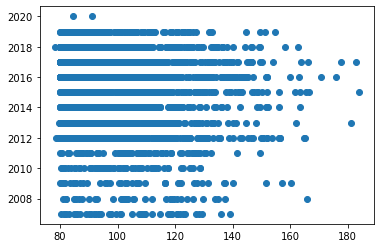

In [125]:
bcorp_US_cleaned 
plt.scatter(bcorp_US_cleaned.overall_score, bcorp_US_cleaned.assessment_year)

plt.show()


In [32]:
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_community, bcorp_US_cleaned.overall_score)
r

0.3815226252845382

In [34]:
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_governance, bcorp_US_cleaned.overall_score)
r

0.22179038167069323

In [35]:
(s, i, r, p, stderr) = sts.linregress(bcorp_US_cleaned.impact_area_workers, bcorp_US_cleaned.overall_score)
r

nan

In [14]:
##Clean up--find nulls 
bcorp_nulls = bcorp.isnull()
bcorp_nulls2 = bcorpnulls.loc[]

,company_name,date_first_certified,date_certified,current_status,description,industry,industry_category,products_and_services,country,state,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
0,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,True,False
1,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
2,False,False,False,False,False,False,False,False,False,False,...,True,True,True,True,True,True,True,True,True,False
3,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6695,False,False,False,False,False,False,False,False,False,False,...,True,False,False,True,False,True,True,False,True,False
6696,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,True,False
6697,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,False,True,False
6698,False,False,False,False,False,False,False,False,False,False,...,True,False,False,False,False,True,True,False,True,False


In [8]:
bcorp.describe()

,assessment_year,overall_score,impact_area_community,impact_area_customers,impact_area_environment,impact_area_governance,impact_area_workers,impact_area_community_na_score,impact_area_customers_na_score,impact_area_environment_na_score,...,ia_workers_it_human_rights_labor_policy,ia_workers_it_job_flexibility_corporate_culture,ia_workers_it_management_worker_communication,ia_workers_it_occupational_health_safety,ia_workers_it_training_education,ia_workers_it_worker_benefits,ia_workers_it_worker_owned,ia_workers_it_worker_ownership,ia_workers_it_workforce_development,certification_cycle
count,6700.000000,6700.000000,6700.000000,6373.000000,6700.000000,6700.000000,6032.000000,6700.000000,6373.000000,6700.000000,...,891.000000,2211.000000,4820.000000,1714.000000,4029.000000,2098.000000,200.000000,4604.000000,420.000000,6700.000000
mean,2015.767612,96.509388,30.547619,15.572917,17.798963,12.513090,23.099577,0.714858,0.027915,0.581649,...,0.699551,2.011940,3.249876,1.029755,1.749392,6.832793,6.066000,2.669353,15.862381,1.537164
std,2.355011,16.529540,14.845124,17.178484,13.625884,3.992916,9.812453,0.909584,0.239016,1.053494,...,0.429894,0.872352,2.085339,0.714891,1.113376,3.232137,10.923335,1.935648,14.348564,0.819576
min,2007.000000,78.200000,4.400000,0.000000,0.000000,1.900000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,1.000000
25%,2014.000000,83.700000,20.200000,0.000000,7.400000,9.400000,19.000000,0.000000,0.000000,0.000000,...,0.400000,1.400000,1.800000,0.600000,1.000000,4.500000,0.000000,1.800000,2.275000,1.000000
50%,2016.000000,91.300000,26.300000,9.900000,12.100000,12.500000,23.900000,0.500000,0.000000,0.200000,...,0.800000,2.000000,2.700000,1.100000,1.600000,6.900000,0.000000,2.600000,14.050000,1.000000
75%,2018.000000,104.400000,38.000000,27.100000,27.025000,15.400000,28.700000,1.100000,0.000000,0.800000,...,1.100000,2.700000,4.425000,1.300000,2.300000,9.100000,3.100000,3.000000,25.800000,2.000000
max,2020.000000,184.000000,125.400000,79.400000,96.900000,41.300000,81.800000,8.000000,8.800000,22.900000,...,1.600000,5.300000,14.400000,7.700000,9.100000,21.300000,30.000000,19.500000,61.800000,6.000000


In [ ]:
# api_key = 'f4ae33ad947344b3bd1564ad4a1bae42' #Last10K
api_key = '75719085374ecbca5e00b430a0ec66f0fa9c2dd44d3b308d46740d8b2383d72f' #sec-api.io





In [59]:
# sec-api-io


import json
import urllib.request
from pprint import pprint
api_key = '75719085374ecbca5e00b430a0ec66f0fa9c2dd44d3b308d46740d8b2383d72f' #sec-api.io

# API Key
# TOKEN = YOUR_API_KEY # replace YOUR_API_KEY with the API key you got from sec-api.io after sign up
# API endpoint
API = "https://api.sec-api.io?token=" + '75719085374ecbca5e00b430a0ec66f0fa9c2dd44d3b308d46740d8b2383d72f'

# define the filter parameters you want to send to the API 
payload = {
  "query": { "query_string": { "query": "cik: 789019   AND filedAt:{2016-01-01 TO 2016-12-31} AND formType:\"10-Q\"" } },
  "from": "0",
  "size": "10",
  "sort": [{ "filedAt": { "order": "desc" } }]
}

# format your payload to JSON bytes
jsondata = json.dumps(payload)
jsondataasbytes = jsondata.encode('utf-8')   # needs to be bytes

# instantiate the request 
req = urllib.request.Request(API)

# set the correct HTTP header: Content-Type = application/json
req.add_header('Content-Type', 'application/json; charset=utf-8')
# set the correct length of your request
req.add_header('Content-Length', len(jsondataasbytes))

# send the request to the API
response = urllib.request.urlopen(req, jsondataasbytes)

# read the response 
res_body = response.read()
# transform the response into JSON
filings = json.loads(res_body.decode("utf-8"))

# print JSON 
pprint(filings)

{'filings': [{'cik': '789019',
              'companyName': 'MICROSOFT CORP',
              'filedAt': '2016-10-20',
              'formType': '10-Q',
              'id': '1758614a0883d56b37376f440a143492',
              'linkToHtml': 'https://www.sec.gov/Archives/edgar/data/789019/0001193125-16-742796-index.htm',
              'linkToTxt': 'https://www.sec.gov/Archives/edgar/data/789019/0001193125-16-742796.txt',
              'ticker': 'MSFT'},
             {'accessionNo': '0001193125-16-550254',
              'cik': '789019',
              'companyName': 'MICROSOFT CORP',
              'companyNameLong': 'MICROSOFT CORP (Filer)',
              'dataFiles': [{'description': 'XBRL INSTANCE DOCUMENT',
                             'documentUrl': 'https://www.sec.gov/Archives/edgar/data/789019/000119312516550254/msft-20160331.xml',
                             'sequence': '7',
                             'size': '2929473',
                             'type': 'EX-101.INS'},
            

In [101]:
# import json
import urllib
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json 
from matplotlib import pyplot as plt
from pprint import pprint

In [18]:
api_key = '862c747482f3448c9d171c57c45ff917' #Last10K
api_key = "&apikey=" + api_key
ticker= 'msft'
formType = '10-K'
filingOrder = 0
base_url_cash_flow = ("https://services.last10k.com/v1/company/msft/cashflows?formType=10-K&filingOrder=0")

response = requests.get(base_url_cash_flow + api_key)
data = response.json
print(response)

<Response [401]>


In [47]:
import http.client, urllib.request, urllib.parse, urllib.error, base64, urllib.request

conn = http.client.HTTPSConnection('services.last10k.com')
conn.request("GET", "/v1/company/msft/balancesheet?%s" % params, "{body}", headers)
response = conn.getresponse()
response.code

200

In [308]:
########### Python 3.2 #############
import http.client, urllib.request, urllib.parse, urllib.error, base64
# api_key = '862c747482f3448c9d171c57c45ff917'
# data = []
# attributes = []
# result = []
# NetIncomeLoss = []
# filingOrder=['1','2','3','4','5','6','7','8','9']

headers = {
    # Request headers
    'Ocp-Apim-Subscription-Key': '862c747482f3448c9d171c57c45ff917',
}

params = urllib.parse.urlencode({
    # Request parameters
#     for i in filingOrder:
    'formType': '10-K',    
    'filingOrder': '0',
})
ticker='LAUR'

try:
    
    conn = http.client.HTTPSConnection('services.last10k.com')
    conn.request("GET", f"/v1/company/{ticker}/cashflows?%s" % params, "{body}", headers)
    response = conn.getresponse()
    info_data = response.read().decode('utf-8')
    print(info_data)
    conn.close()
#     
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))
# for info in info_data:
#         data.append(info_data['data'])
#         attributes.append(info_data['attributes'])
        
####################################
# print(data['meta'][0])


{"meta":{"copyright":"Copyright 2020 Last10K.com All Rights Reserverd","terms":"https://dev.last10k.com/terms"},"data":{"attributes":{"status":0,"company":{"name":"LAUREATE EDUCATION, INC.","cik":"912766","ticker":"laur"},"filing":{"name":"Consolidated Statements Of Cash Flows","accessionNumber":"0001628280-20-002350","filingDate":"2020-02-27T00:00:00","period":"2019-12-31T00:00:00","source":"10-K","filingCount":8},"count":38,"result":{"ProfitLoss":937664000.0,"AssetImpairmentCharges":43754000.0,"GainLossOnDispositionOfAssets1":-796333000.0,"ShareBasedCompensation":12994000.0,"ProvisionForDoubtfulAccounts":100829000.0,"DeferredIncomeTaxesAndTaxCredits":-29813000.0,"ForeignCurrencyTransactionGainLossUnrealized":29186000.0,"OtherNoncashIncomeExpense":-5341000.0,"IncreaseDecreaseInReceivables":-163202000.0,"IncreaseDecreaseInPrepaidDeferredExpenseAndOtherAssets":-42047000.0,"IncreaseDecreaseInAccountsPayableAndAccruedLiabilities":5574000.0,"IncreaseDecreaseInIncomeTaxesPayableNetOfIncomeT

In [293]:
[print(i) for i in filingOrder]

1
2
3
4
5
6
7
8
9


[None, None, None, None, None, None, None, None, None]

In [289]:
import ast
# my_string = "{'result':'val','key2':2}"
my_dict = ast.literal_eval(info_data)
net_income = my_dict['data']['attributes']['result']['NetIncomeLoss']
filing_date = my_dict['data']
filingPeriod = my_dict['data']['attributes']['filing']['period']
# net_income
(filingPeriod)
filing_year = (filingPeriod[0:4])
filing_year = int(filing_year)
net_income
# filing_year

95894000.0

(2016, 2020)

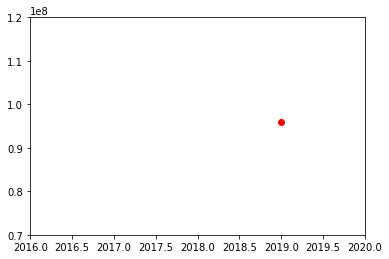

In [290]:
plt.scatter(filing_year, net_income, color = 'r')
plt.ylim((70000000,120000000))
plt.xlim((2016,2020))
# companies.head()

In [113]:
filingPeriod = my_dict['data']['attributes']['filing']
filingPeriod
# s=str(data,'utf-8')

# file = open("data.txt","w") 

# file.write(s)
# df=pd.read_csv('data.txt')




{'name': 'Cash Flows Statements',
 'accessionNumber': '0001564590-20-034944',
 'filingDate': '2020-07-31T00:00:00',
 'period': '2020-06-30T00:00:00',
 'source': '10-K',
 'filingCount': 17}

In [ ]:
string = response.read().decode('utf-8')
string.replace("b'",'')

In [54]:
from datetime import date
import yfinance as yf
yf.pdr_override()
import pandas as pd
from pandas_datareader import data as pdr



In [51]:
ticker_list=['DJIA','DOW','LB','EXPE','PXD','MCHP']

In [58]:

today=date.today()
start_date= '2017–01–01'
end_date='2019–11–30'
files=[]
def getData(ticker):
    print(ticker)
    data=pdr.get_data_yahoo(ticker,start=start_date,end=today)
    dataname=ticker+'_'+str(today)
    files.append(dataname)
    SaveData(data,dataname)
for tik in ticker_list:
    getData(tik)
    
def SaveData(df, filename):
    df.to_csv('./data/’+filename+’.csv')

DJIA


Exception in thread Thread-6:
Traceback (most recent call last):
  File "C:\Users\diamo\anaconda3.7\lib\threading.py", line 926, in _bootstrap_inner
    self.run()
  File "C:\Users\diamo\anaconda3.7\lib\threading.py", line 870, in run
    self._target(*self._args, **self._kwargs)
  File "C:\Users\diamo\anaconda3.7\lib\site-packages\multitasking\__init__.py", line 102, in _run_via_pool
    return callee(*args, **kwargs)
  File "C:\Users\diamo\anaconda3.7\lib\site-packages\yfinance\multi.py", line 167, in _download_one_threaded
    actions, period, interval, prepost, proxy, rounding)
  File "C:\Users\diamo\anaconda3.7\lib\site-packages\yfinance\multi.py", line 182, in _download_one
    rounding=rounding, many=True)
  File "C:\Users\diamo\anaconda3.7\lib\site-packages\yfinance\base.py", line 121, in history
    _time.strptime(str(start), '%Y-%m-%d')))
  File "C:\Users\diamo\anaconda3.7\lib\_strptime.py", line 571, in _strptime_time
    tt = _strptime(data_string, format)[0]
  File "C:\Use

KeyboardInterrupt: 

In [ ]:
import socketio

sio = socketio.Client()

sio.on('connect', namespace='/all-filings')
def on_connect():
    print("Connected to https://api.sec-api.io:3334/all-filings")

sio.on('filing', namespace='/all-filings')
def on_filings(filing):
    print(filing)

sio.connect('https://api.sec-api.io:3334?apiKey=75719085374ecbca5e00b430a0ec66f0fa9c2dd44d3b308d46740d8b2383d72f', namespaces=['/all-filings'])
sio.wait()